In [1]:
from IPython.display import Image
import pandas as pd

# **1) EXPLORATION**

# **1.a**

## Dane trenujące mają 72208 obserwacji oraz 5000 zmiennych.

## Dane testujące mają 18052 obserwacji oraz 5000 zmiennych.

# **1.b**

In [2]:
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/exploration/1_b.png"

--2022-12-18 22:12:35--  https://github.com/SIIIKOR/sad2/raw/main/projekt1/exploration/1_b.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/exploration/1_b.png [following]
--2022-12-18 22:12:36--  https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/exploration/1_b.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10133 (9.9K) [image/png]
Saving to: ‘1_b.png’

1_b.png             100%[===================>]   9.90K  --.-KB/s    in 0s      

2022-12-18 22:12:36 (91.3 MB/s) - ‘1_b.png’ saved [10133/10133]



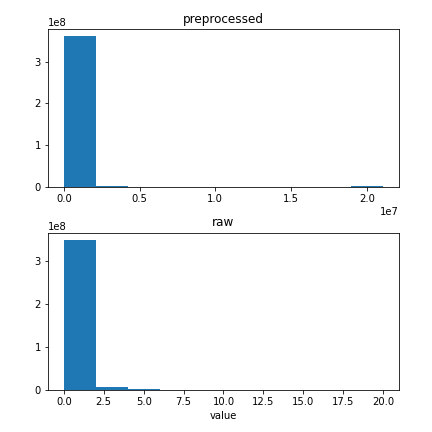

In [3]:
Image('1_b.png')

# 1.**c**

- Has the data beeen normalized to 10k reads? NIE, bo jest napisane "Counts were then normalized per cell by divided the UMI counts by the size factors" nie było nigdzie nic napisane o 10k reads
- Has it been log1p transformed? TAK, "Finally, normalized counts are log1p transformed"
- has it been scaled to unit variance? chyba NIE, nie znalazłem informacji na ten temat.



# 1.**d**

In [4]:
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/exploration/1_d.png"

--2022-12-18 22:12:36--  https://github.com/SIIIKOR/sad2/raw/main/projekt1/exploration/1_d.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/exploration/1_d.png [following]
--2022-12-18 22:12:36--  https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/exploration/1_d.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12388 (12K) [image/png]
Saving to: ‘1_d.png’

1_d.png             100%[===================>]  12.10K  --.-KB/s    in 0s      

2022-12-18 22:12:36 (89.1 MB/s) - ‘1_d.png’ saved [12388/12388]



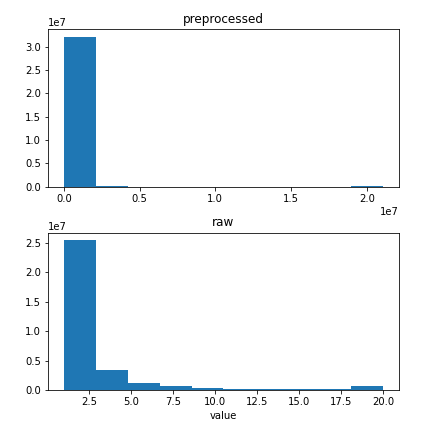

In [5]:
Image('1_d.png')

# 1.**e**

Brak zer wpływa na to, że pierwszy bar będzie niższy, tym samym sprawi to, że inne bar'y będą wyższe i lepiej zauważalne.

Dzięki temu zabiegowi łatwiej będzie nam stwierdzić rzeczywisty rozkład danych.

Co prawda od strony biologicznej zera mogą być interpretowane jako brak albo mała wartość ekspresji genów, więc teoretycznie nie powinno się ich odrzuczać.
Ale zera mogą też oznaczać brakujące dane. Więc nasze podejście zależy od poziomu naszej wiary w rzetelność danych.

Na oko rozkład zdaje się przypominać exponential distribution z większą wartością rates.

Ew. negative binomial albo poisson.


# 1.**f**

W tym df'ie mamy dodatkowe dane o naszych danych.
Są przykładowo informacje o tym czy dawca był palaczem, jaki miał typ krwi, płeć, etniczność. 

In [6]:
['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors',
    'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts',
    'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order',
    'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
    'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
    'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker',
    'is_train']

['GEX_n_genes_by_counts',
 'GEX_pct_counts_mt',
 'GEX_size_factors',
 'GEX_phase',
 'ADT_n_antibodies_by_counts',
 'ADT_total_counts',
 'ADT_iso_count',
 'cell_type',
 'batch',
 'ADT_pseudotime_order',
 'GEX_pseudotime_order',
 'Samplename',
 'Site',
 'DonorNumber',
 'Modality',
 'VendorLot',
 'DonorID',
 'DonorAge',
 'DonorBMI',
 'DonorBloodType',
 'DonorRace',
 'Ethnicity',
 'DonorGender',
 'QCMeds',
 'DonorSmoker',
 'is_train']

- patient_amount: 72208
- lab_amount: 4
- ncell_type_amount: 45

# **2) Vanilla VAE training**

# **Wstęp**

Modele były trenowane na wycinku wielkości 2500 sampli z batch size 25.
Beta = 1 oraz z liniowym scheduler'em.

Modele dla większych ilości sampli trenowały się bardzo długo. Podczas trenowania korzystałem tylko z google colab. Modele w sumie i tak trenowały się kilka godzin.

Wiem, że pewnie powinienem korzystać z entropii, ale przyznam, że nigdy tego nie robiłem. Zdałem sobie sprawę, że powinienem tak robić trochę za późno i już było mi głupio o prosić o dostęp do klastra.

Na gpu od google i z wykorzystanie mojej architektury nie byłem w stanie ustawić większego batch size ponieważ inaczej przekroczyłbym dostępną ilość pamięci ram gpu.

# **2.a**

# **100**

latent space size: 100

In [7]:
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/training_ld100_plot.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/testing_ld100_plot.png"

--2022-12-18 22:12:36--  https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/training_ld100_plot.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/training_ld100_plot.png [following]
--2022-12-18 22:12:36--  https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/training_ld100_plot.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14638 (14K) [image/png]
Saving to: ‘training_ld100_plot.png’

training_ld100_plot 100%[===================>]  14.29K  --.-KB/s    in 0s      

2022-12-18 22:12:36 (49.2 MB

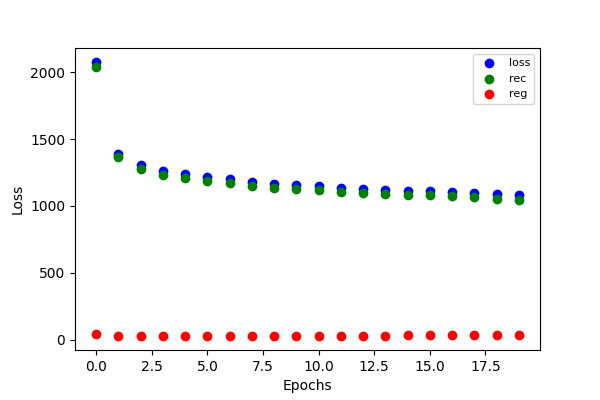

In [8]:
Image('training_ld100_plot.png')

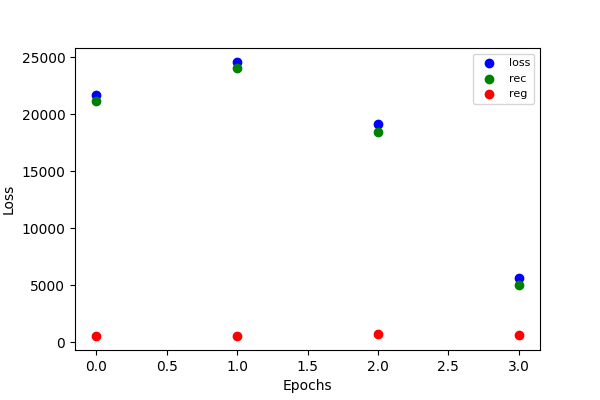

In [9]:
Image('testing_ld100_plot.png')

# **300**

latent space size: 300

In [10]:
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/training_ld300_plot.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/testing_ld300_plot.png"

--2022-12-18 22:12:37--  https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/training_ld300_plot.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/training_ld300_plot.png [following]
--2022-12-18 22:12:37--  https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/training_ld300_plot.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14773 (14K) [image/png]
Saving to: ‘training_ld300_plot.png’

training_ld300_plot 100%[===================>]  14.43K  --.-KB/s    in 0.001s  

2022-12-18 22:12:37 (26.2 MB

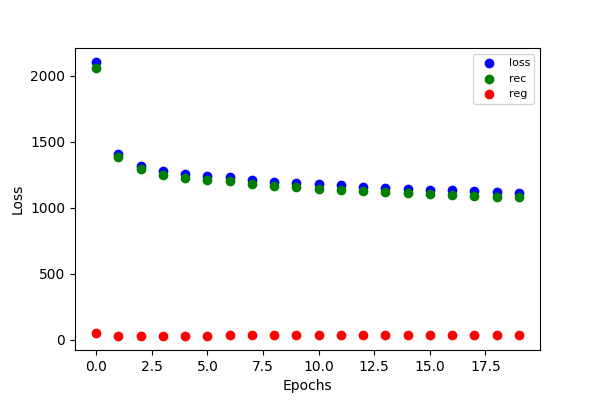

In [11]:
Image('training_ld300_plot.png')

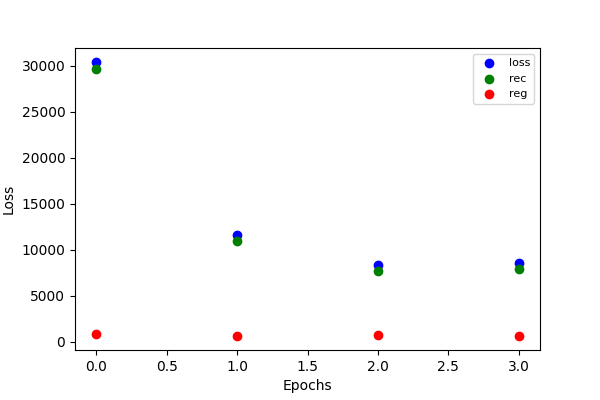

In [12]:
Image('testing_ld300_plot.png')

latent space size: 600

In [13]:
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/training_ld600_plot.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/testing_ld600_plot.png"

--2022-12-18 22:12:38--  https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/training_ld600_plot.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/training_ld600_plot.png [following]
--2022-12-18 22:12:38--  https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/training_ld600_plot.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14763 (14K) [image/png]
Saving to: ‘training_ld600_plot.png’

training_ld600_plot 100%[===================>]  14.42K  --.-KB/s    in 0s      

2022-12-18 22:12:38 (34.5 MB

# **600**

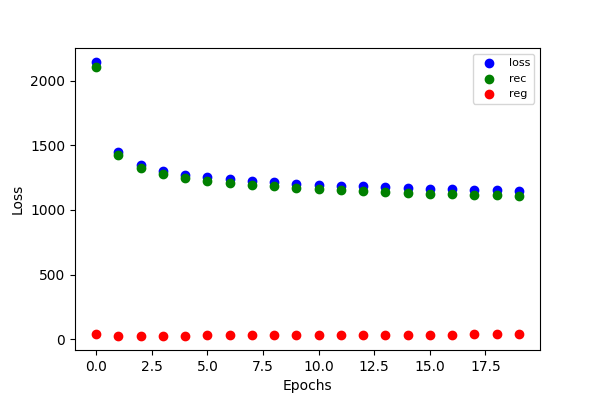

In [14]:
Image('training_ld600_plot.png')

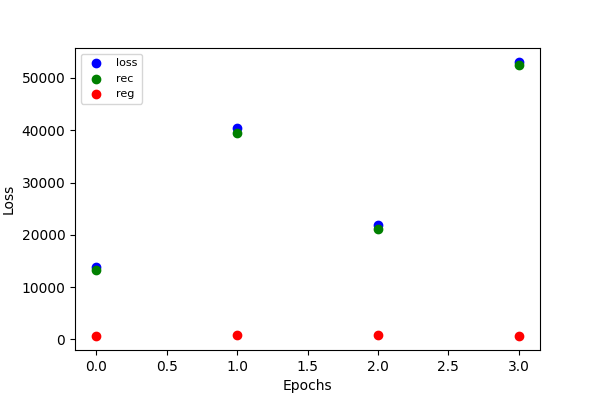

In [15]:
Image('testing_ld600_plot.png')

# **2.b**

In [16]:
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/train_pca_df.csv"

--2022-12-18 22:12:38--  https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/train_pca_df.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/train_pca_df.csv [following]
--2022-12-18 22:12:38--  https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/train_pca_df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75 [text/plain]
Saving to: ‘train_pca_df.csv’

train_pca_df.csv    100%[===================>]      75  --.-KB/s    in 0s      

2022-12-18 22:12:39 (4.08 MB/s) - ‘train_pca_df.csv’ saved [75/7

In [17]:
pd.read_csv('train_pca_df.csv').drop("Unnamed: 0", axis=1)

,latent_space_size,over_95_number_of_components
0,100,21
1,300,22
2,600,23


# **2.a/2.b wnioski**

Wykresy training loss nie różnią się od siebie znacząco. Wszystkie zdają się zbiegać do około 1000. Warto zaznaczyć, że wartości training loss były reskalowane, testing loss nie było, więc nie można ich ze sobą zbytnio porównywać.

Wykresy testing loss już zauważalnie się od siebie różnią. Wynika z nich, to, że latent space z pewnością powinien być mniejszy od 600.

Moim zdaniem wykres od 300 wygląda najlepiej, chociaż wykres dla 100 osiąga najlepszy loss.

Więcej o wyborze rozmiaru latent space w 2.d, ale w skórcie chce wybrać możliwie mały latent space, taki, że wyniki są jeszcze ok. Kierując się tą logiką, osobiście wybrał bym dla tego modelu latent space rozmiaru 100.

Patrząc na tabelkę liczby komponentów tłumaczących ponad 95% wariancji możemy zauważyć, że model o najmniejszym latent space potrzebuje najmniejszej liczby komponentów. Wydaje mi się, że to kolejna przesłanka mówiąca nam, że ten model najlepiej generalizuje.

# **2.c**

In [18]:
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/latent_size_space_25_100.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/latent_size_space_25_300.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/latent_size_space_25_600.png"

--2022-12-18 22:12:39--  https://github.com/SIIIKOR/sad2/raw/main/projekt1/Vanilla_VAE_training/latent_size_space_25_100.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/latent_size_space_25_100.png [following]
--2022-12-18 22:12:39--  https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Vanilla_VAE_training/latent_size_space_25_100.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65304 (64K) [image/png]
Saving to: ‘latent_size_space_25_100.png’

latent_size_space_2 100%[===================>]  63.77K  --.-KB/s    in 0.01s   

2022-12-

# **latent_size_space_25_100**

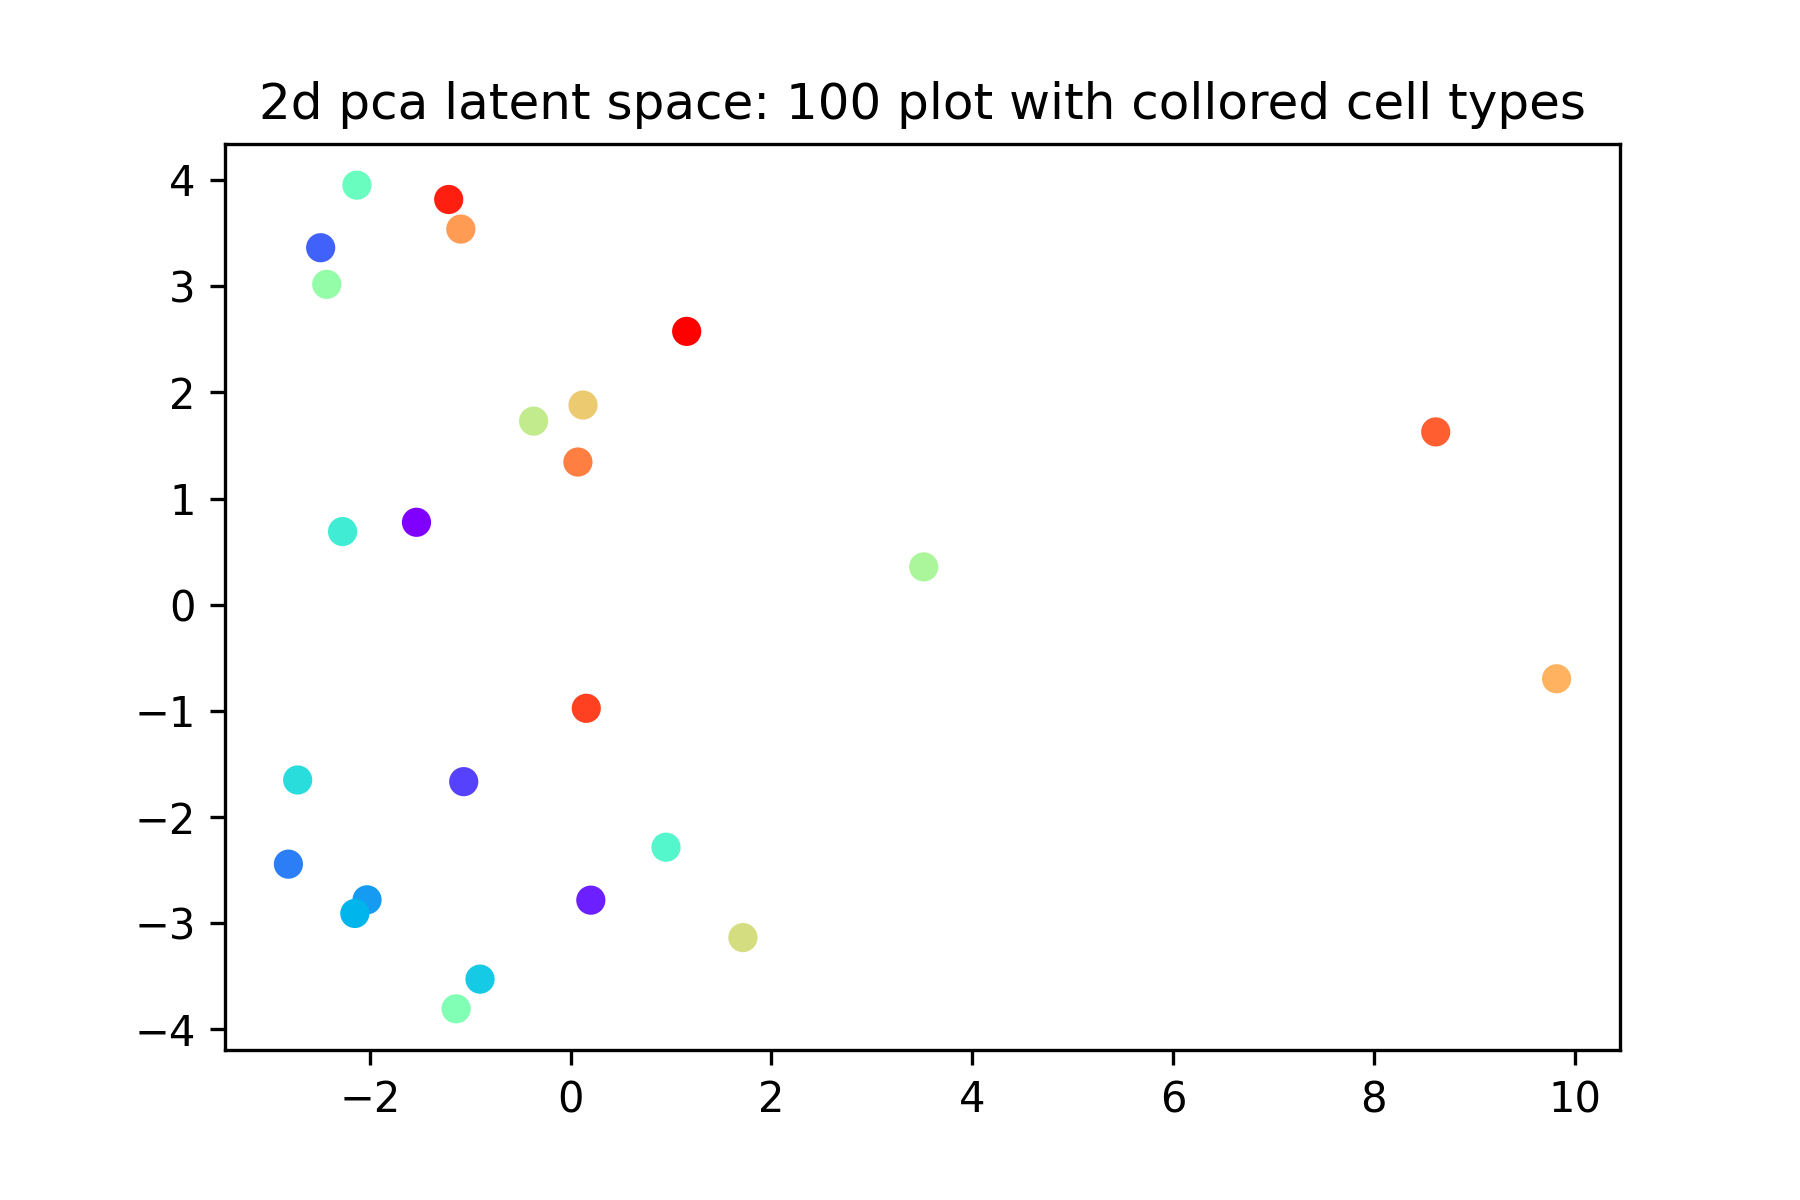

In [19]:
Image('latent_size_space_25_100.png', width=800)

# **latent_size_space_25_300**

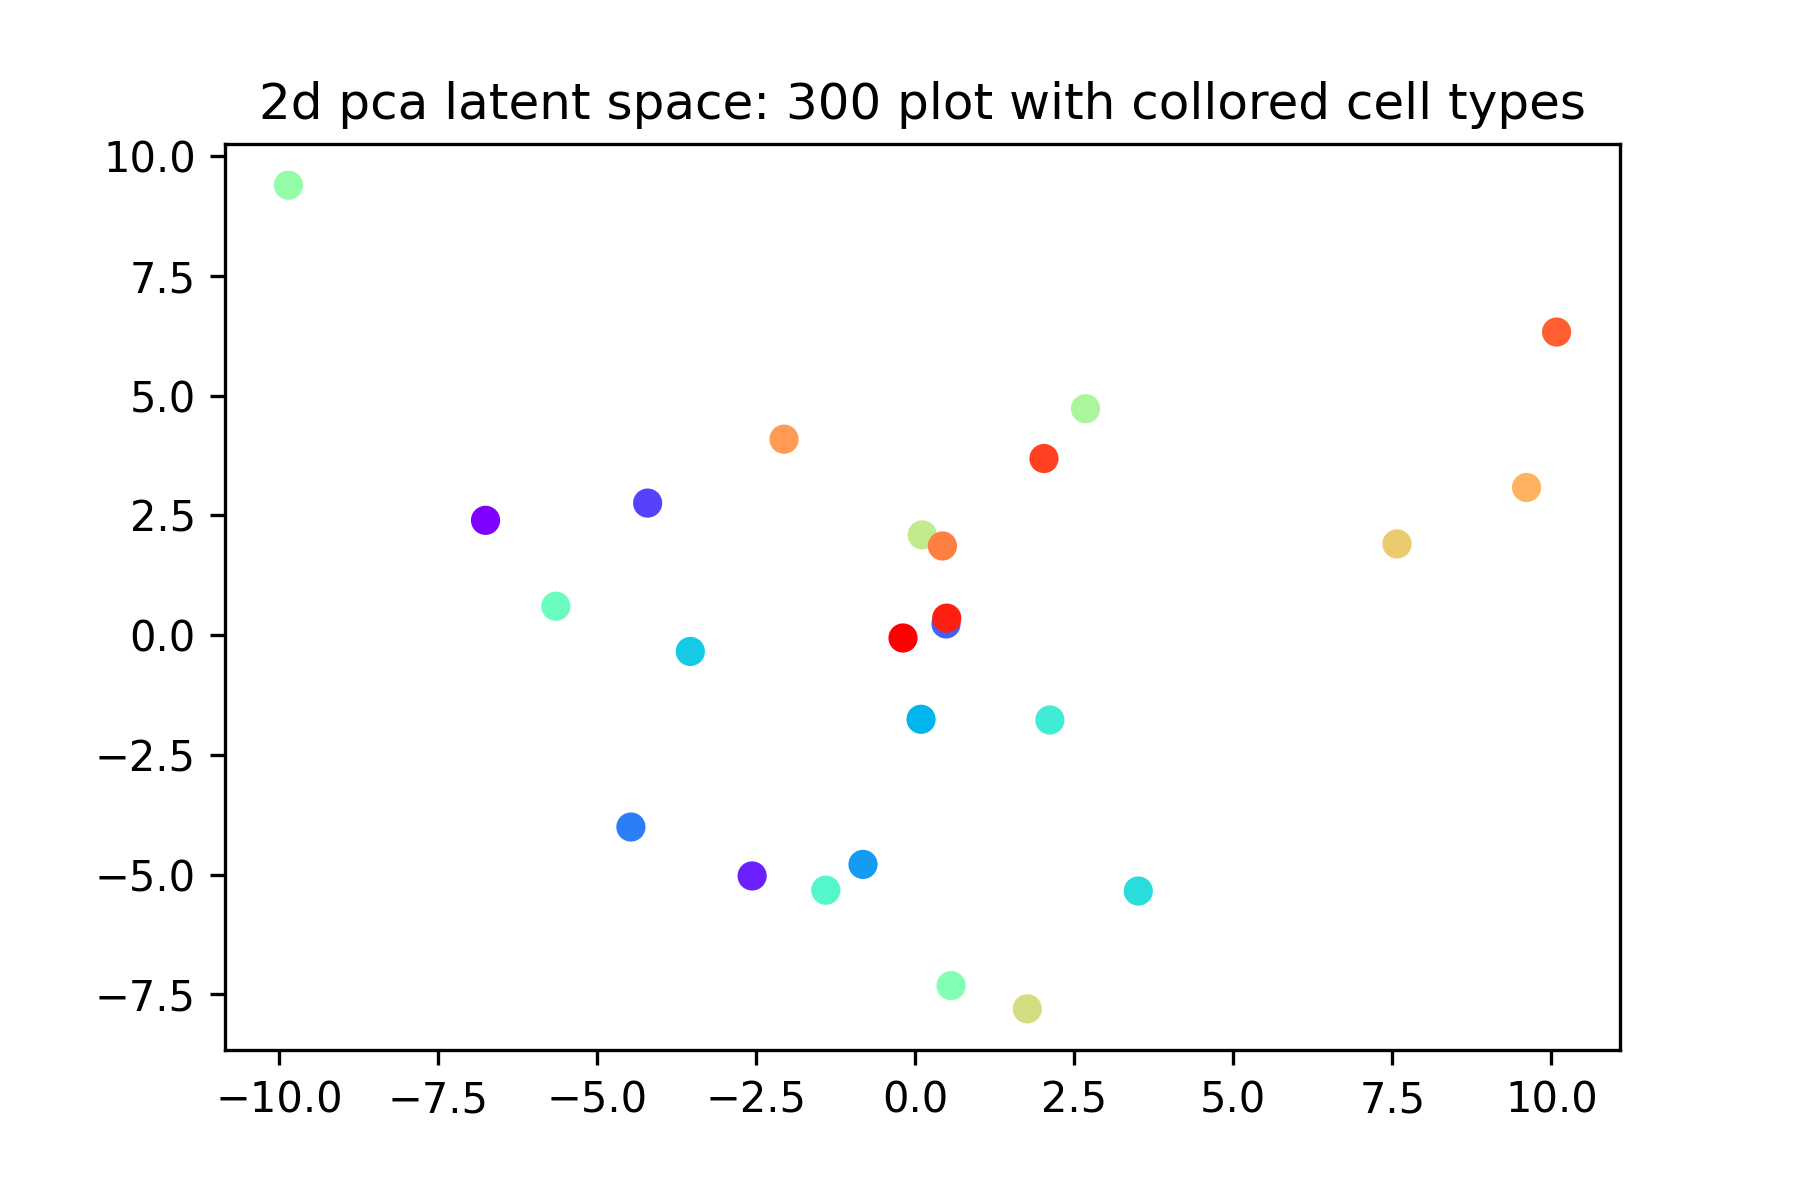

In [20]:
Image('latent_size_space_25_300.png', width=800)

# **latent_size_space_25_600**

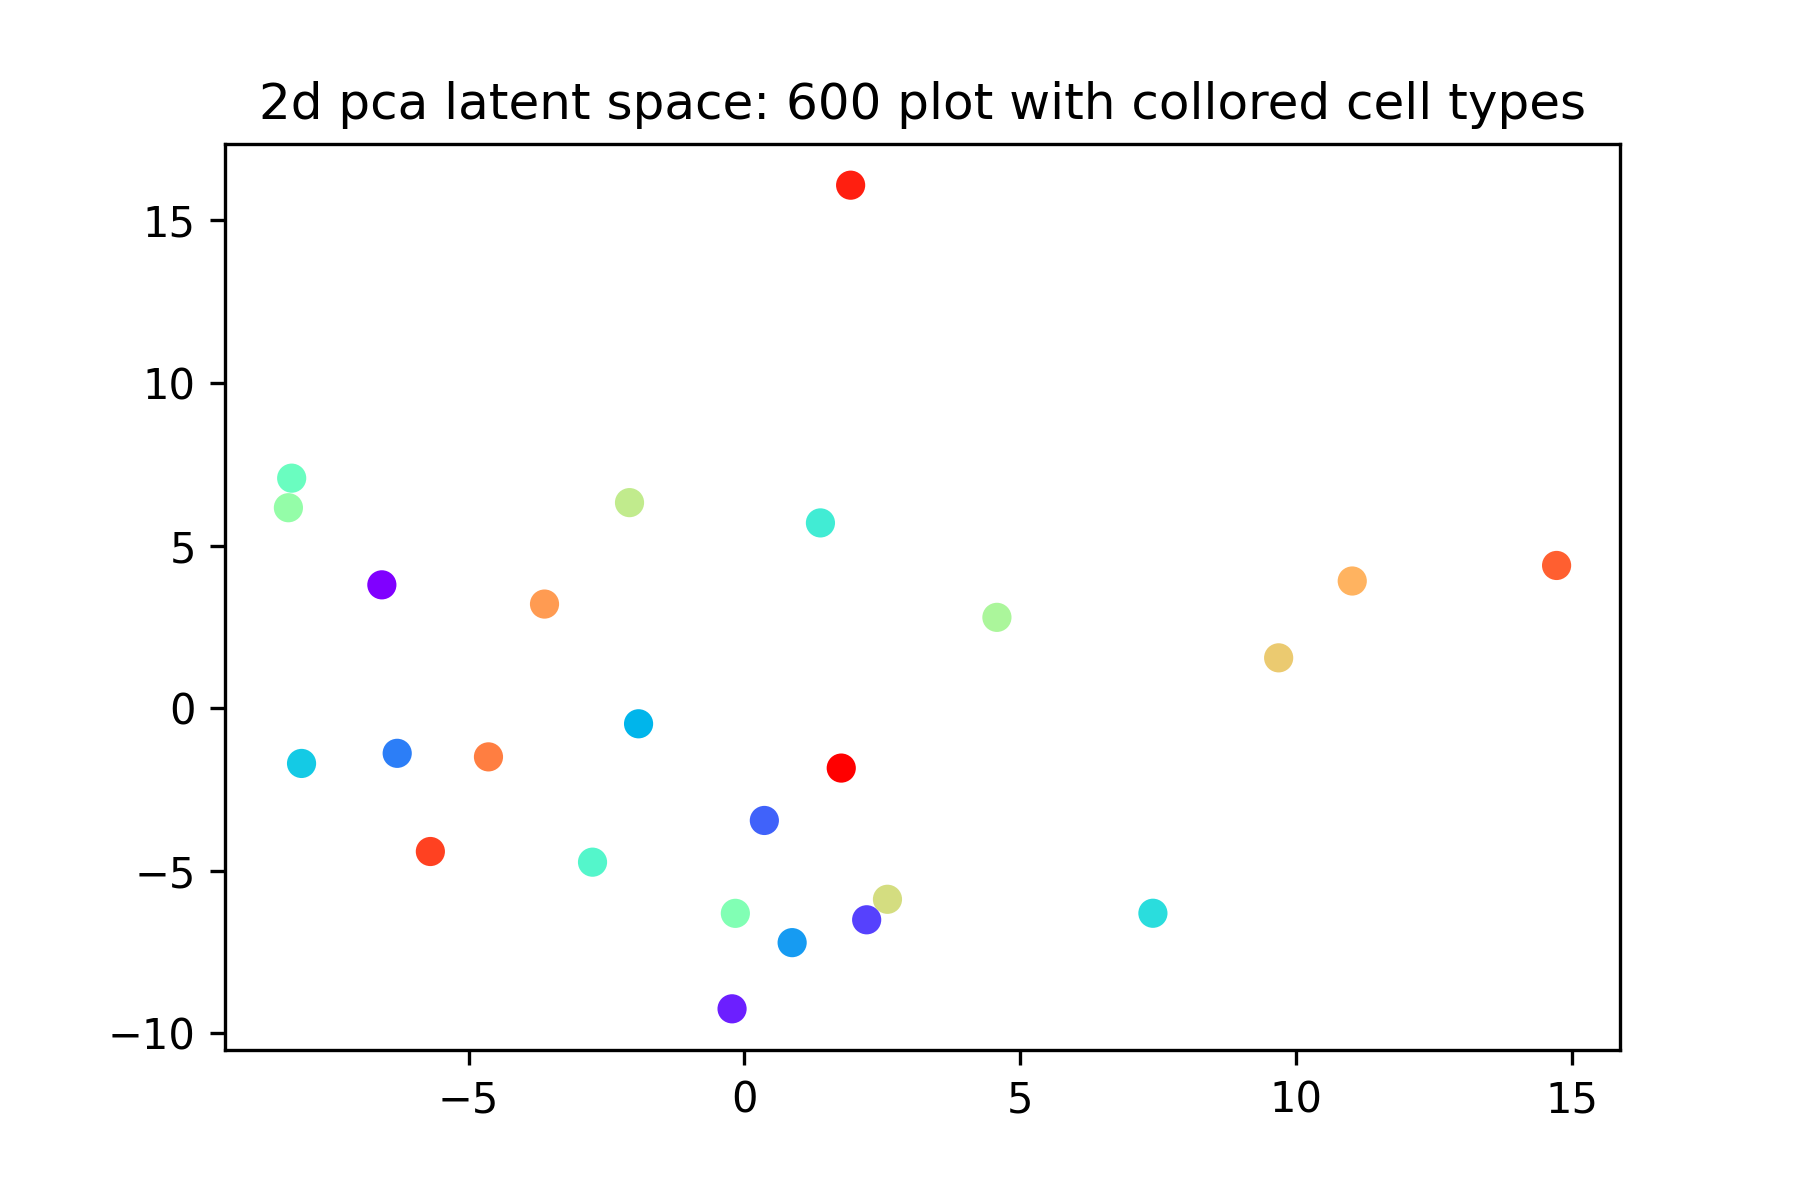

In [21]:
Image('latent_size_space_25_600.png', width=800)

# **2.c wnioski**

Przyznam, że nie wiem jak w ogólności wyglądają analogiczne wizualizacje latent space. W związku z tym nie jestem w stanie obiektywnie stwierdzić, czy wizualizacje latent space moich modeli wypadają dobrze.

Wydaje mi się, że zdecydowanie najgorzej wygląda wizualizacja dla latent space 600.

Te dla 100 i 300 wyglądają dużo lepiej. Można znaleźć trochę typów komórek leżących relatywnie blisko siebie. Więc chyba mamy jakiś sukces?

# **2.d**

# **Wybór rozmiaru latent space**

Rozmiar latent space zazwyczaj ma wpływ na information loss między encoderem a decoderem. Sprawia, że sieć nie może ślepo zapamiętywać sposóbu przeprowadzania danych z inputu do outputu. 

Latent space, który powoduje information loss rzeczywiście znajduje najważniejsze zmienne, czyli te, które mają największy wpływ na dane. Taka mniej wymiarowa reprezentacja danych wejściowych. Jeśli nie ma information loss, to nie uzyskamy takiego latent space.

W związku z tym wszystkim powinienem wziąć możliwie mały latent space, taki, że output daje wyniki akceptowalnie podobne do inputu. To znaczy sieć jest w stanie sensownie decodować.

Naturalnie nie jestem w stanie iteracyjnie sprawdzić wszystkich wielkości latent space, dlatego postanowiłem sprawdzić trzy wartości w równych odstępach od siebie i wybrać najmniejszą, która jeszcze daje sensowne wyniki i jest możliwie mała.

# **Preprocessed czy raw data**

Postanowiłem wykorzystać preprocessed.

Głównie z tego powodu, że wartości w nim są bardziej zbliżone, więc jest mniejsza szansa na jakieś wybuchy gradientu. Co prawda dane i tak transformuje log1p. Kolejnym powodem było to, że mimo wszystko mam zaufanie do tego, że z jakiegoś powodu ten preprocessing był zrobiony i ufam twórcom.

Dodatkowo, podczas przekazywania parametrów do rozkładu decodera, zamieniam zera na epsilon równy 1e-8.

# **3) Custom Decoder**

# **3.a**

# **Wybór rozkładu custom decodera**

Do customowego decodera wykorzystałem exponential distribution.

Decyzję tą podjąłem patrząc na histogramy z zadania 1.b.

Zdecydowana Większość wartości zdaje się lądować w jednym bin'ie dla małych wartości.

Bin'y dla większych wartości zawierają zdecydowanie mniej wartości.

Exponential distribution z odpowiednio dużą wartością parametru rates powinien
tworzyć rozkład zbliżony wyglądem do tego z histogramu. To znaczy taki, że największe prawdopodobieństwo będą miały mniejsze wartości.

Oczywiście to trochę ślepy strzał.
W internecie znalazłem kilka artykułów z których wynikało, że dane
scRNAseq są często modelowane rozkładem possiona i negative binomial:
- https://www.biorxiv.org/content/biorxiv/early/2020/12/29/2020.12.28.424633.full.pdf?fbclid=IwAR1qT6IwVzrS_US_LA3wznApmQk68_EKpQJS740JSmYXpEY6ESpjCBaH51k
- https://genomebiology.biomedcentral.com/articles/10.1186/s13059-022-02601-5?fbclid=IwAR3pDITonXTqNR4ItmKlgxo_5Vbwaa2joyBNMqE-4dCe3vitTlPvJEZfcDg

Possion na start odpada ponieważ wymaga liczb całkowitych.
Z kolei negative binomial wydawał się dla mnie niewygodny w implementacji. Chodzi o problem z predykcją parametrów, w szczególności tego mówiącego o ilości sukcesów w eksperymencie.

Sieć z ExponentialDecoderem trenowała się znacząco szybciej od MultivariateNormal, ale wydaje się, że bardzo szybko convergowała i to do gorszych wartości. Ta szybkość trenowania wydaje się bardzo podejrzana, może mam jakiegoś buga w implementacji, którego nie znalazłem.

Model trenowałem na 10000 sampli, dalej na 25 batch size.

Co ciekawe dla większych latent space, loss w pewnym momencie eksploduje do NAN. Niestety nie wiedziałem jak sobie z tym poradzić. Może to też ma związek z jakimś nieodkrytym błędem z mojej strony.

In [22]:
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_training_ld100_plot.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_training_ld300_plot.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_training_ld600_plot.png"

!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_testing_ld100_plot.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_testing_ld300_plot.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_testing_ld600_plot.png"

--2022-12-18 22:12:40--  https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_training_ld100_plot.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Custom_Decoder/exponential_training_ld100_plot.png [following]
--2022-12-18 22:12:40--  https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Custom_Decoder/exponential_training_ld100_plot.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13546 (13K) [image/png]
Saving to: ‘exponential_training_ld100_plot.png’

exponential_trainin 100%[===================>]  13.23K  --.-KB/s    in 0s      

# **exponential 100**

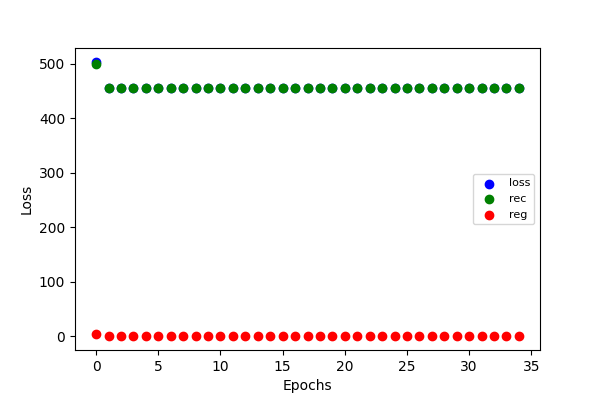

In [23]:
Image("exponential_training_ld100_plot.png")

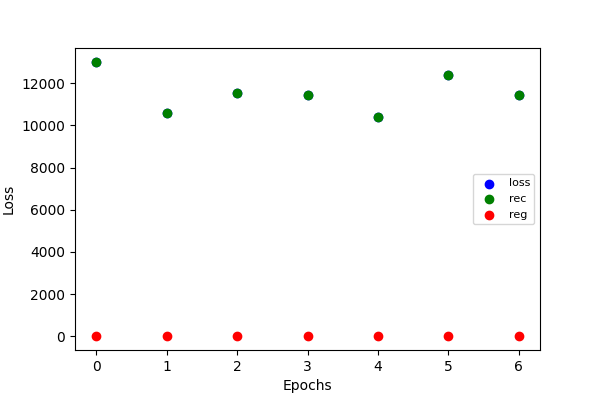

In [24]:
Image("exponential_testing_ld100_plot.png")

# **exponential 300**

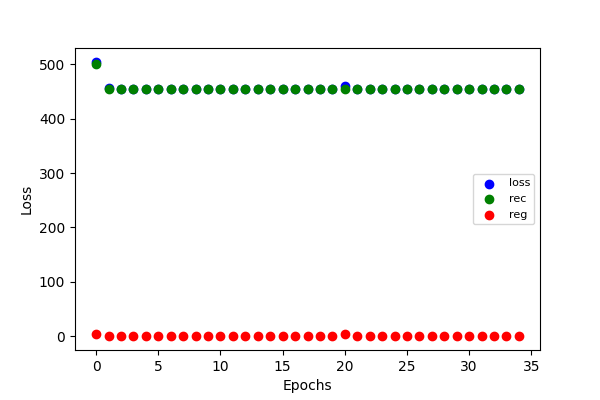

In [25]:
Image("exponential_training_ld300_plot.png")

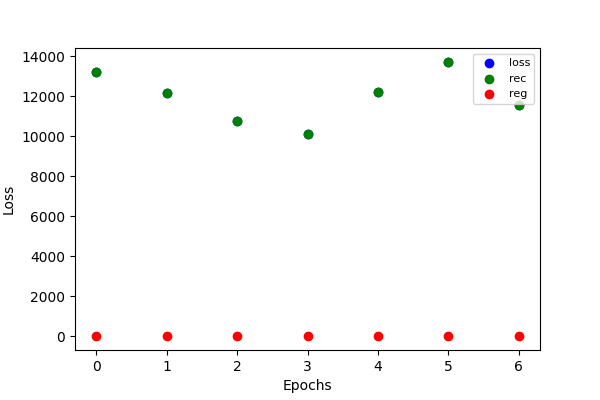

In [26]:
Image("exponential_testing_ld300_plot.png")

# **exponential 600**

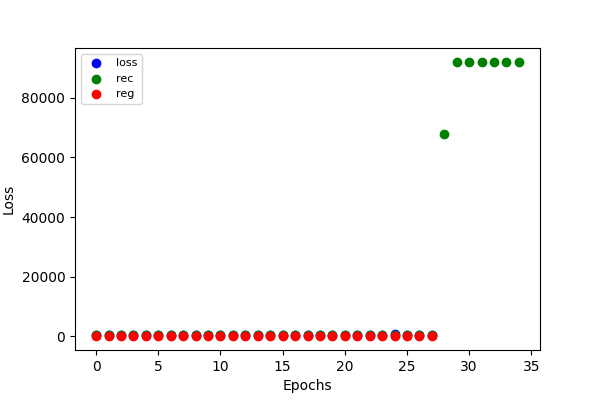

In [27]:
Image("exponential_training_ld600_plot.png")

Tutaj widzimy wykres dla największego latent space. Widać, że loss z jakiegoś powodu w pewnym momencie eksploduje do NAN.

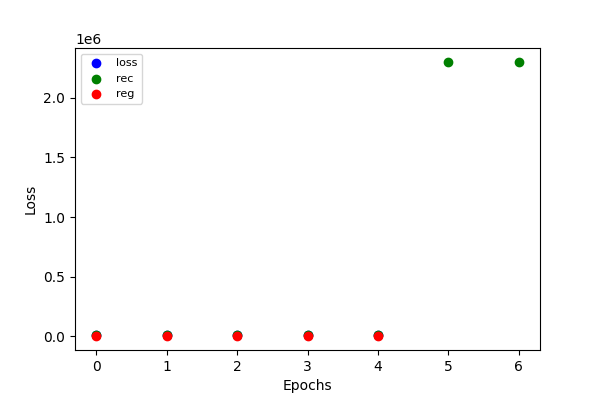

In [28]:
Image("exponential_testing_ld600_plot.png")

# **3.a Wnioski**

Najbardziej intrygującą rzeczą tutaj jest eksplodujący loss dla największego latent space. Niestety nie wiem dlaczego tak się dzieje.

Poza tym, dwa mniejsze modele wydają się bardzo szybko zbiegać na training loss.

Testing loss również wydaje się szybko zbiegać.

Nie wygląda to dobrze i obiecująco.

# **3.b**

# **Wybór finalnego modelu**

Ostatecznie wydaje mi się, że sieć z MultivariateNormal daje najlepsze wyniki.
To dlatego, bo sieć ma dostęp do parametru średnich. Czyli de facto ma bezpośreni wpływ na to w okół jakich wartości rozkłąd się usytuuje. Naturalnie sprawia to, że jest ryzyko przeuczenia i słabej generalizacji. Oczywiście w preciwieństwie do exponenetialDecodera wymagany jest jeszcze parametr do macierzy covariancji, dykutujący tak jakby losowość na którą sieć nie ma wpływu, to trochę taki czynnik regularyzacyjny, który powinien polepszać generalizacje sieci.

Tutaj wspomnę jeszcze o pewnej obserwacji związanej z MultivariateNormal i danymi mnist. Dla bardzo małych wartości w cov matrix, sieć wydawała się oszukiwać. W takiej sytuacji sieć miała pełną kontrolę nad tym jakie wartości będzie wypluwać(brak losowości, bo średnie to de facto wartości outputu). To znaczy praktycznie po pierwszej iteracji, generowała bardzo dobre obrazki. Domyślam się, że generowane obrazki dla losowych danych dają słabe wyniki, ale niestety nie miałem czasu tego sprawdzić.

# **3.c**

In [29]:
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_latent_size_space_25_100.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_latent_size_space_25_300.png"
!wget "https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_latent_size_space_25_600.png"

--2022-12-18 22:12:42--  https://github.com/SIIIKOR/sad2/raw/main/projekt1/Custom_Decoder/exponential_latent_size_space_25_100.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Custom_Decoder/exponential_latent_size_space_25_100.png [following]
--2022-12-18 22:12:42--  https://raw.githubusercontent.com/SIIIKOR/sad2/main/projekt1/Custom_Decoder/exponential_latent_size_space_25_100.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63074 (62K) [image/png]
Saving to: ‘exponential_latent_size_space_25_100.png’

exponential_latent_ 100%[===================>]  61.60K  --.

# **exponential_latent_size_space_25_100**

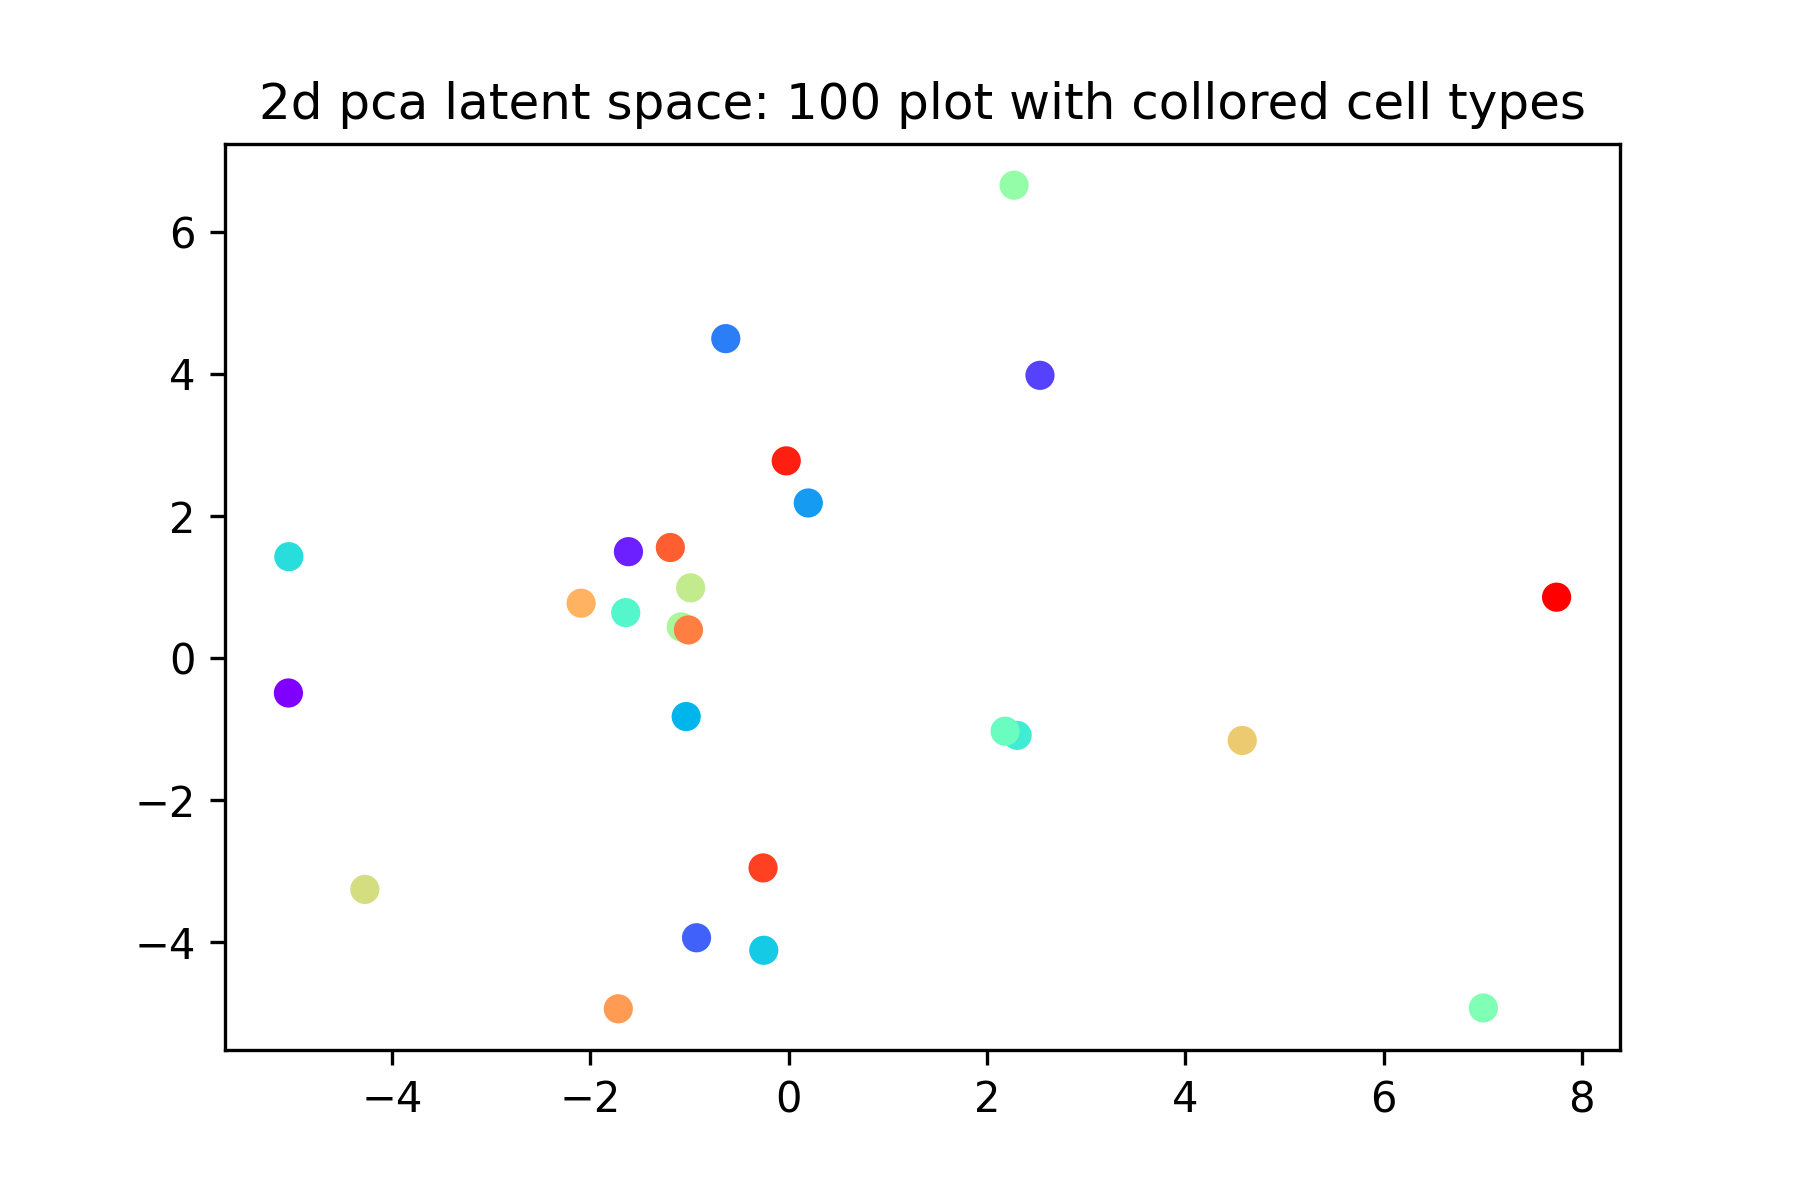

In [30]:
Image("exponential_latent_size_space_25_100.png", width=800)

# **exponential_latent_size_space_25_300**

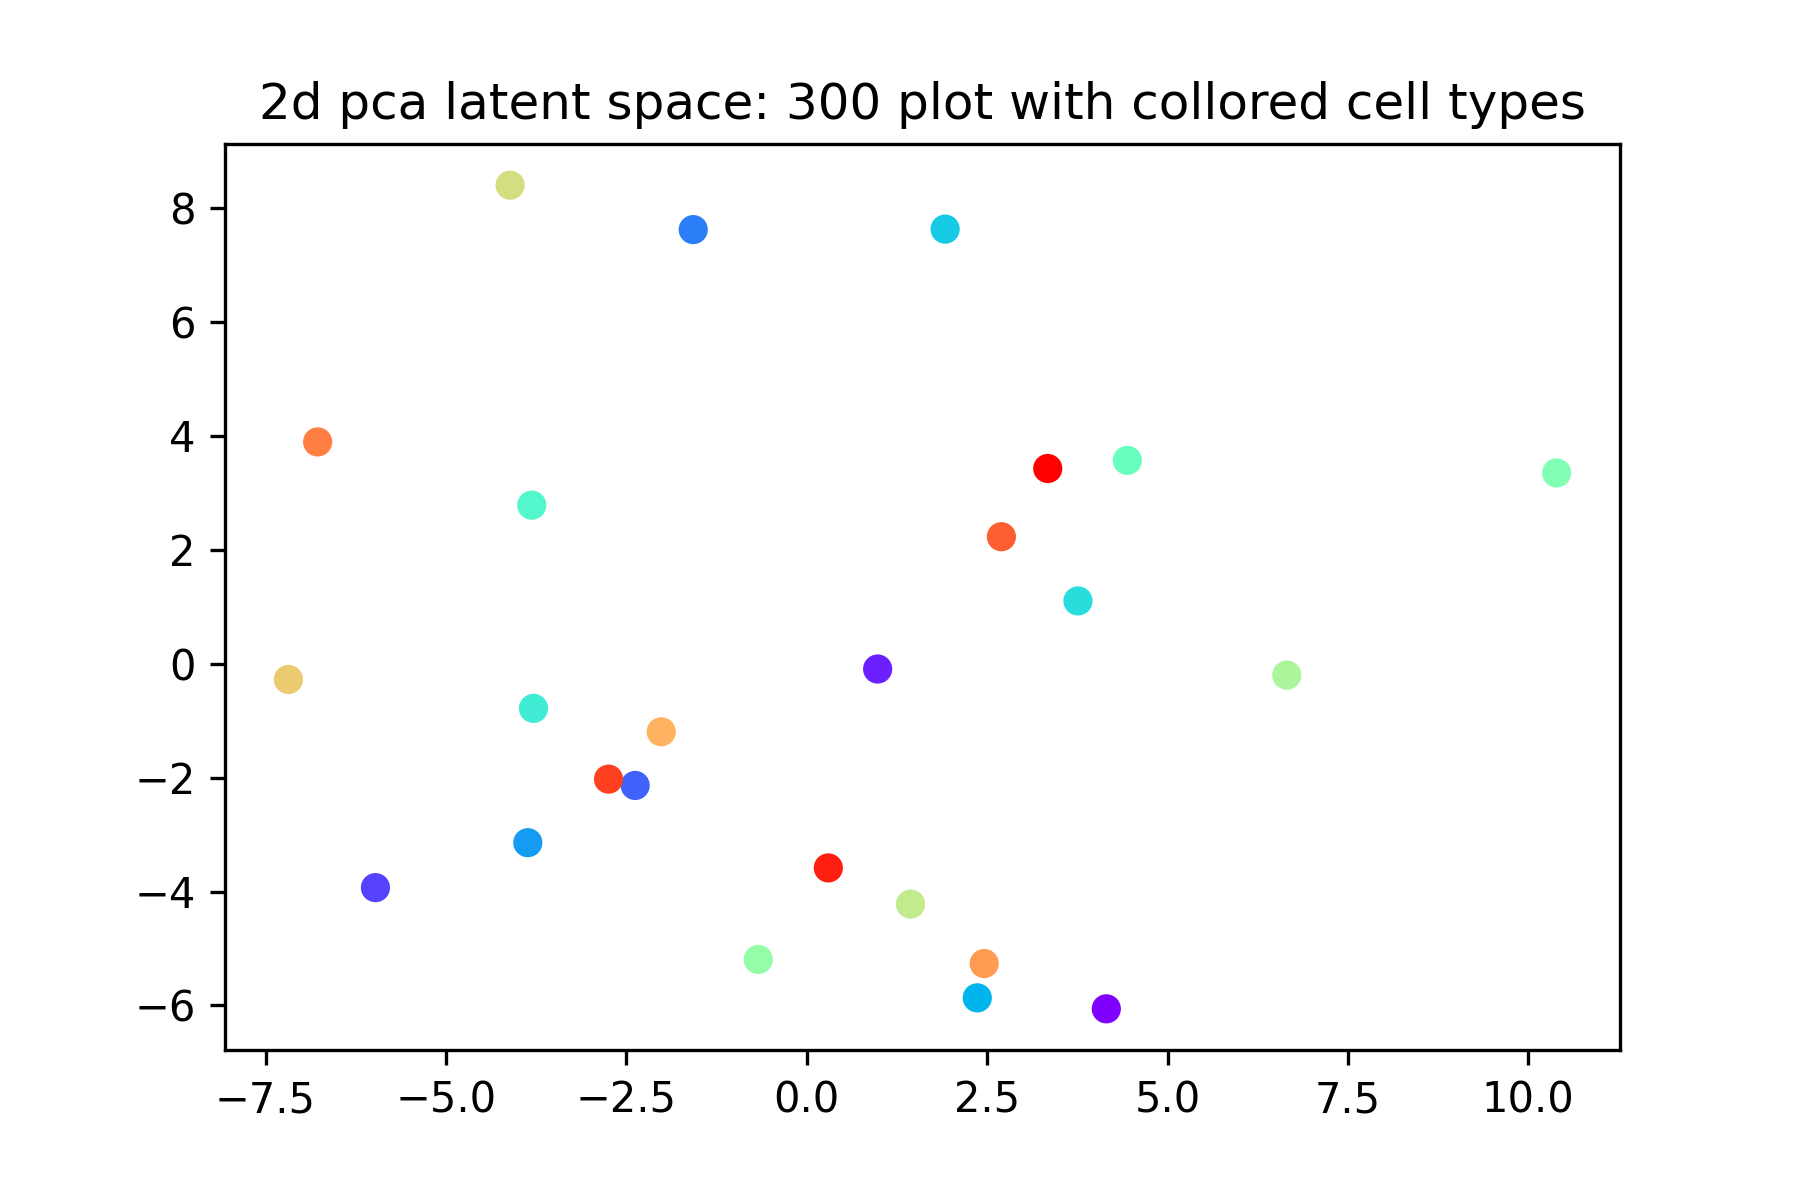

In [31]:
Image("exponential_latent_size_space_25_300.png", width=800)

# **exponential_latent_size_space_25_600**

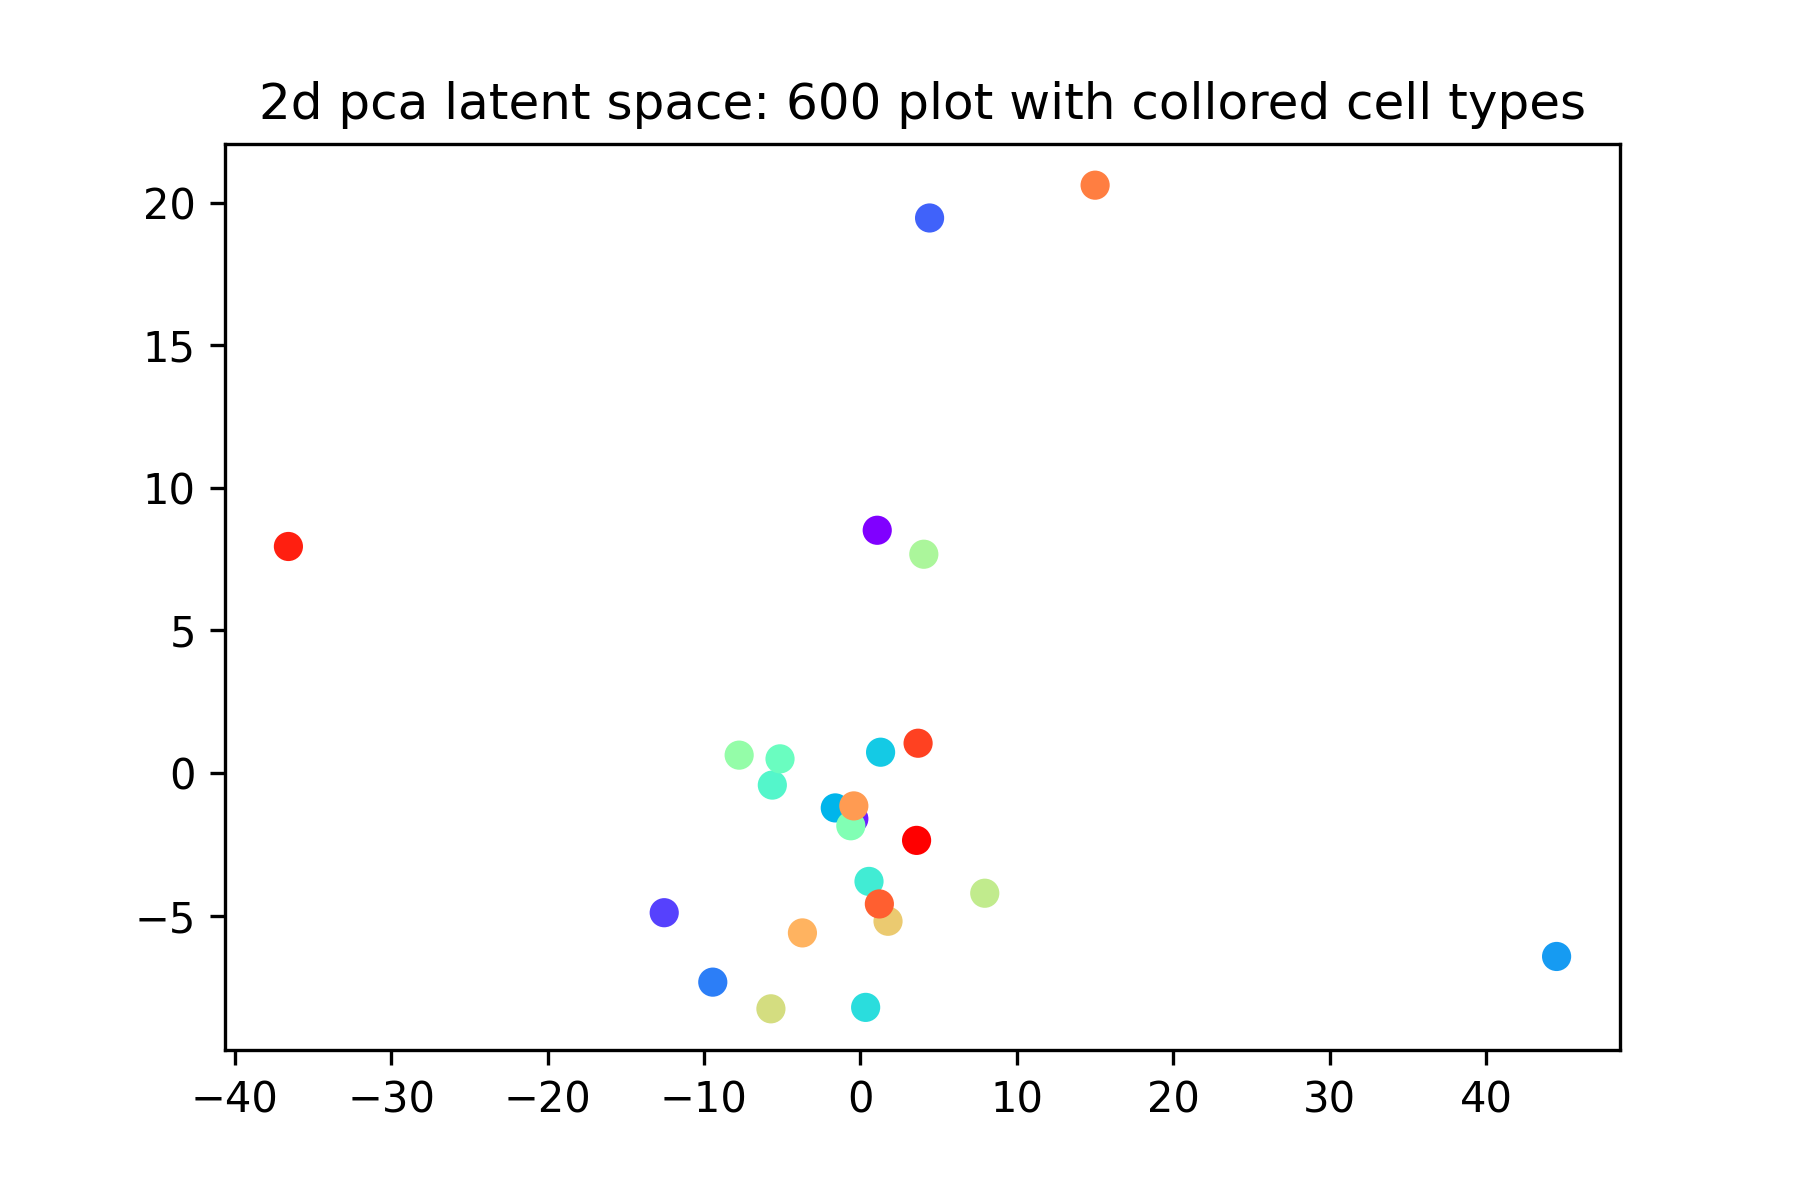

In [32]:
Image("exponential_latent_size_space_25_600.png", width=800)

# **3.c Wnioski**

Wizualizacje wydają się dużo gorsze od tych z modelu z MultivariateNormal.

Co ciekawe model z największym latent space ma najbardziej zbite ze sobą punkty.

Finalnie wydaje mi się, że wizulizacja latent space 100 dla modelu MultivariateNormal wygląda dużo lepiej niż ta modelu Exponential 100.